## Regression Analysis

Regression Analysis is a statistical process for estimating the relationships between the dependent variables or criterion variables and one or more independent variables or predictors.

#### Types of Regressions

    Linear Regression
    Lasso Regression
    ElasticNet Regression
    Ridge Regression
    
    Logistic Regression -> Classification
    
    Polynomial Regression -> Non-linear Relationship -> polynomial
    Poisson Regression -> y -> multiple class values
    Stepwise Regression -> 
    Quantile Regression -> 
    Huber regression -> Robust regression -> Outlier treatment

##### 1. Linear Regression
   
Linear regression is used to fit a regression model that describes the relationship between one or more predictor variables and a numeric response variable.

Use when:

- The relationship between the predictor variable(s) and the response variable is reasonably linear.
- The response variable is a continuous numeric variable.

Example: A retail company may fit a linear regression model using advertising spend to predict total sales.

Since the relationship between these two variables is likely linear (more money spent on advertising generally leads to an increase in sales) and the response variable (total sales) is a continuous numeric variable, it makes sense to fit a linear regression model.

![Linear Regression](Linear-Regression.jpg)

##### 2. Logistic Regression

Logistic regression is used to fit a regression model that describes the relationship between one or more predictor variables and a binary response variable.

Use when:

- The response variable is binary – it can only take on two values.
    
Example: Medical researchers may fit a logistic regression model using exercise and smoking habits to predict the likelihood that an individual experiences a heart attack.

Since the response variable (heart attack) is binary – an individual either does or does not have a heart attack – it’s appropriate to fit a logistic regression model.

![Logistic Regression](logistic_regression.png)

Ref: https://www.statology.org/logistic-regression/

##### 3. Polynomial Regression

Polynomial regression is used to fit a regression model that describes the relationship between one or more predictor variables and a numeric response variable.

Use when:

- The relationship between the predictor variable(s) and the response variable is non-linear.
- The response variable is a continuous numeric variable.
    
Example: Psychologists may fit a polynomial regression using ‘hours worked’ to predict ‘overall happiness’ of employees in a certain industry.

The relationship between these two variables is likely to be nonlinear. That is, as hours increases an individual may report higher happiness but beyond a certain number of hours worked, overall happiness is likely to decrease. Since this relationship between the predictor variable and response variable is nonlinear, it makes sense to fit a polynomial regression model.

![Polynomial Regression](polynomial-regression.jpg)

Ref: https://www.statology.org/polynomial-regression/

##### 4. Ridge Regression
   
Ridge regression is used to fit a regression model that describes the relationship between one or more predictor variables and a numeric response variable.

Use when:

- The predictor variables are highly correlated and multicollinearity becomes a problem.
- The response variable is a continuous numeric variable.
    
Example: A basketball data scientist may fit a ridge regression model using predictor variables like points, assists, and rebounds to predict player salary.

The predictor variables are likely to be highly correlated since better players tend to get more points, assists, and rebounds. Thus, multicollinearity is likely to be a problem so we can minimize this problem by using ridge regression.

![Ridge Regression](Lasso-Ridge-Elastic-Regression.png)

Ref: https://www.ejable.com/tech-corner/ai-machine-learning-and-deep-learning/logistic-and-linear-regression/#1_L2_%E2%80%93_Ridge_Regression

Ref: https://www.statology.org/ridge-regression/

##### 5. Lasso Regression

Lasso regression is very similar to ridge regression and is used to fit a regression model that describes the relationship between one or more predictor variables and a numeric response variable.

Lasso Regression, short for **Least Absolute Shrinkage and Selection Operator** Regression, is a type of linear regression that includes a penalty term to enforce sparsity. The penalty term is the L1 norm of the coefficients, which leads to the shrinking of some coefficients to zero, effectively performing variable selection.

Use when:

- High Dimensionality: When you have a large number of features, Lasso can help reduce the model complexity by selecting only the most important features.

- Feature Selection: When you want to identify and keep only the relevant features while discarding the less important ones.

- Multicollinearity: When predictor variables are highly correlated, Lasso can help reduce the impact of multicollinearity by shrinking coefficients.

- Overfitting: When you aim to prevent overfitting by adding a regularization term that penalizes large coefficients.

Example: An economist may fit a lasso regression model using predictor variables like total years of schooling, hours worked, and cost of living to predict household income.

The predictor variables are likely to be highly correlated since individuals who receive more schooling also tend to live in cities with higher costs of living and work more hours. Thus, multicollinearity is likely to be a problem so we can minimize this problem by using lasso regression.

Note that Lasso regression and ridge regression are quite similar. When multicollinearity is a problem in a dataset, i’s recommended to fit both a Lasso and Ridge regression model to see which model performs best.

Ref: https://www.ejable.com/tech-corner/ai-machine-learning-and-deep-learning/logistic-and-linear-regression/#1_L2_%E2%80%93_Ridge_Regression

Ref: https://www.statology.org/lasso-regression/

##### 6. Elastic Regression

Elastic Net Regression is a regularized regression method that combines both L1 (Lasso) and L2 (Ridge) penalties. It's particularly useful when dealing with multicollinearity (high correlation between predictor variables) and when you have more predictors than observations.

When to Use Elastic Net Regression
- Multicollinearity: When predictor variables are highly correlated, Elastic Net can help by combining the strengths of Lasso and Ridge regression.
- High Dimensionality: When you have a large number of features (p) compared to the number of observations (n), Elastic Net can help in feature selection and regularization.
- Model Stability: When you want to ensure that the model is not overly sensitive to small changes in the data.

Example: 

Let's say you're working on a dataset predicting house prices based on various features like square footage, number of bedrooms, number of bathrooms, and location. You have a large number of features, and some of them are highly correlated (e.g., square footage and number of bedrooms).

In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import ( ElasticNet, Lasso, Ridge, PoissonRegressor, 
                                    LogisticRegression, LinearRegression, QuantileRegressor )
from sklearn.metrics import mean_squared_error 

# Sample data 
data = { 'Square_Footage': [1500, 2000, 2500, 3000, 3500], 
        'Bedrooms': [3, 4, 3, 5, 4], 
        'Bathrooms': [2, 3, 2, 4, 3], 
        'Location': [1, 2, 1, 3, 2], 
        'Price': [300000, 400000, 350000, 500000, 450000] 
       } 

df = pd.DataFrame(data) 

# Define features and target 

X = df[['Square_Footage', 'Bedrooms', 'Bathrooms', 'Location']] 
y = df['Price'] 

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialize and fit the Elastic Net model 
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5) 
elastic_net.fit(X_train, y_train) 

# Make predictions 
y_pred = elastic_net.predict(X_test) 

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 

# Coefficients 
print(f'Coefficients: {elastic_net.coef_}') 
print(f'Intercept: {elastic_net.intercept_}')

Mean Squared Error: 593119249.8085248
Coefficients: [   57.32818263 15301.42389562 15301.43169413 15301.44217954]
Intercept: 123276.72001201351


In this example:

- alpha is the regularization strength.
- l1_ratio is the mix of L1 and L2 penalties (0 = Ridge, 1 = Lasso).

By adjusting these parameters, you can control the balance between feature selection (Lasso) and regularization (Ridge), making Elastic Net a versatile and powerful tool for regression tasks.

##### 7. Poisson Regression
Poisson Regression is a type of generalized linear model (GLM) that is used for modeling count data and contingency tables. It assumes that the dependent variable follows a Poisson distribution, which is suitable for count data where the values are non-negative integers (0, 1, 2, ...).

When to Use Poisson Regression:

- Count Data: When the dependent variable represents counts, such as the number of events occurring in a fixed period of time (e.g., number of car accidents per week, number of customers visiting a store per day).

- Event Rate Data: When you want to model the rate of occurrence of an event, especially when the exposure time varies across observations (e.g., number of infections per 100 person-years).

- Non-Negative Outcomes: When the outcome variable cannot take negative values and the data is over-dispersed (variance is greater than the mean)..
 
Example: A university may use Poisson regression to examine the number of students who graduate from a specific college program based on their GPA upon entering the program and their gender.

In this case, since the response variable consists of count data (we can “count” the number of students who graduate – 200, 250, 300, 413, etc.) it’s appropriate to use Poisson regression.

Ref: https://www.statology.org/poisson-regression/

![Poisson Regression](poissonRegression.jpg)

Example

Suppose you are analyzing the number of insurance claims filed by policyholders in a given year. The dataset includes features like the number of years the policyholder has been insured, age of the policyholder, and whether they have had prior claims.

Here's how you can apply Poisson Regression in Python using the statsmodels library:

In [31]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Sample data
data = {
    'claims': [2, 3, 0, 1, 4],
    'years_insured': [1, 2, 1, 2, 3],
    'age': [25, 45, 35, 50, 40],
    'prior_claims': [0, 1, 1, 2, 0]
}
df = pd.DataFrame(data)

# Define the model formula
formula = 'claims ~ years_insured + age + prior_claims'

# Fit the Poisson Regression model
poisson_model = smf.poisson(formula=formula, data=df).fit()

# Print the summary of the model
print(poisson_model.summary())

# Predictions
df['predicted_claims'] = poisson_model.predict(df)
print(df)


Optimization terminated successfully.
         Current function value: 1.316703
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                 claims   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        1
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.2460
Time:                        13:51:19   Log-Likelihood:                -6.5835
converged:                       True   LL-Null:                       -8.7315
Covariance Type:            nonrobust   LLR p-value:                    0.2312
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6580      4.393     -0.833      0.405     -12.268       4.952
years_insured    -0.

In this example:

- claims is the dependent variable representing the number of insurance claims.

- years_insured, age, and prior_claims are the independent variables.

The Poisson Regression model is fitted to the data, and the summary of the model provides insights into the significance of the predictors and model performance.

Predictions are made for the number of claims based on the fitted model.

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import ( ElasticNet, Lasso, Ridge, PoissonRegressor, 
                                    LogisticRegression, LinearRegression, QuantileRegressor )
from sklearn.metrics import mean_squared_error 

# Sample data
data = {
    'claims': [2, 3, 0, 1, 4],
    'years_insured': [1, 2, 1, 2, 3],
    'age': [25, 45, 35, 50, 40],
    'prior_claims': [0, 1, 1, 2, 0]
}
df = pd.DataFrame(data)

# Define features and target 

X = df[['years_insured', 'age', 'prior_claims']] 
y = df['claims'] 

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialize and fit the Elastic Net model 
poisson_reg = PoissonRegressor() 
poisson_reg.fit(X_train, y_train) 

# Make predictions 
y_pred = poisson_reg.predict(X_test) 

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 

# Coefficients 
print(f'Coefficients: {poisson_reg.coef_}') 
print(f'Intercept: {poisson_reg.intercept_}')

print(np.ceil(y_pred))

Mean Squared Error: 2.258324520521337
Coefficients: [ 0.39886213 -0.00998451 -0.30337091]
Intercept: 0.3585647232969494
[2.]


##### 8. Quantile Regression

Quantile Regression is a type of regression analysis used to estimate the conditional quantiles of a response variable's distribution. Unlike traditional linear regression which estimates the mean of the dependent variable, quantile regression aims to estimate the median or other quantiles (e.g., 25th, 75th percentiles) of the dependent variable, providing a more comprehensive view of the relationship between variables.

When to Use Quantile Regression:

- Non-Normal Distributions: When the data does not meet the assumptions of normality and homoscedasticity.

- Heteroscedasticity: When the variability of the response variable changes across levels of an independent variable.

- Robustness: When the data contains outliers or is skewed, quantile regression provides a more robust estimation of the central tendency.

Detailed Analysis: When you want to understand the relationship between variables at different points in the distribution of the dependent variable (e.g., understanding how factors affect the lower, median, and upper quantiles of income).

Example:

Suppose you have a dataset of test scores from students along with their study hours, and you want to understand how study hours impact different quantiles of the test scores distribution (e.g., the 25th, 50th, and 75th percentiles).

Ref: https://www.statology.org/quantile-regression-in-r/ and https://freedium.cfd/https://towardsdatascience.com/quantile-loss-and-quantile-regression-b0689c13f54d

In [33]:
import pandas as pd
import statsmodels.formula.api as smf

# Sample data
data = {
    'study_hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'test_score': [55, 59, 63, 66, 68, 72, 74, 78, 82, 85]
}
df = pd.DataFrame(data)

# Define the quantiles
quantiles = [0.25, 0.5, 0.75]

# Perform Quantile Regression for each quantile
models = [smf.quantreg(f'test_score ~ study_hours', df).fit(q=q) for q in quantiles]

# Print the summaries
for i, model in enumerate(models):
    print(f'Quantile {quantiles[i]}')
    print(model.summary())

# Make predictions (example for the median quantile)
predicted_median = models[1].predict(df['study_hours'])
df['predicted_median'] = predicted_median
print(df)


Quantile 0.25
                         QuantReg Regression Results                          
Dep. Variable:             test_score   Pseudo R-squared:               0.9377
Model:                       QuantReg   Bandwidth:                         nan
Method:                 Least Squares   Sparsity:                          nan
Date:                Sun, 15 Dec 2024   No. Observations:                   10
Time:                        13:51:19   Df Residuals:                        8
                                        Df Model:                            1
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      51.7143        nan        nan        nan         nan         nan
study_hours     3.2857        nan        nan        nan         nan         nan
Quantile 0.5
                         QuantReg Regression Results                          
Dep. Variable:       

In this example:

- study_hours is the independent variable.
- test_score is the dependent variable.

Quantile regression is performed for the 25th, 50th (median), and 75th percentiles.

The summaries provide insights into how study hours impact different quantiles of test scores.
Predictions are made for the median quantile (50th percentile).

Quantile Regression allows you to understand the impact of independent variables across different points in the distribution of the dependent variable

![Quantile Regression](Quantile-regression.png)

##### 9. Stepwise Regression

Stepwise Regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. The procedure can involve either adding or removing potential variables one-by-one, depending on a chosen criterion like the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or R-squared.

Types of Stepwise Regression:

- Forward Selection: Starts with no variables in the model, and adds one variable at a time based on the chosen criterion until no significant improvement can be made.

- Backward Elimination: Starts with all candidate variables, and removes the least significant variable one at a time until no further variables can be removed without worsening the model.

- Bidirectional Elimination (Stepwise Selection): A combination of forward selection and backward elimination. It adds and removes variables at each step based on the chosen criterion.

When to Use Stepwise Regression:

- Large Set of Variables: When you have a large number of potential predictor variables and want to identify the most important ones.

- Model Simplification: When you aim to simplify the model by selecting a subset of variables that provide a good fit.

- Preliminary Model Building: When you need to quickly identify significant predictors and get an initial model which can be refined later.

Example:

Suppose you have a dataset predicting Diabetes based on various features like 'age', 'sex', 'bmi', 'bp' etc, then we can apply stepwise regression as below:

In [3]:
from sklearn import linear_model

In [4]:
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDOneClassSVM',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_l

In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
diabetes = load_diabetes()

print("Features in the dataset: ", diabetes.feature_names)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Define features and target
X = df.drop(columns=['target'])
y = df['target']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Stepwise Regression using Forward Selection
def forward_selection(X, y, significance_level=0.05):
    initial_features = ['const']
    remaining_features = list(X.columns)
    remaining_features.remove('const')
    selected_features = initial_features.copy()
    
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            selected_features.append(feature)
            model = sm.OLS(y, X[selected_features]).fit()
            p_values.append((feature, model.pvalues[feature]))
            selected_features.remove(feature)
        
        p_values.sort(key=lambda x: x[1])
        best_feature, best_p_value = p_values[0]
        
        if best_p_value < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features

# Perform forward selection
selected_features = forward_selection(X, y)
print(f'Selected features: {selected_features}')

# Fit the final model
final_model = sm.OLS(y, X[selected_features]).fit()
print(final_model.summary())


Features in the dataset:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Selected features: ['const', 'bmi', 's5', 'bp', 's1', 'sex', 's2']
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.01e-65
Time:                        13:51:19   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t

In this example:

Forward selection is used to add significant variables one by one based on the p-values.

The final model is fitted using the optimized set of features.

## Robust or Huber Regression

Huber Regression, also known as Huber loss or Huber estimator, is a type of robust regression method that is used to minimize the effect of outliers in regression models. It combines the features of both ordinary least squares regression and robust regression techniques, providing a balance between the two.

When to Use Huber Regression:

- Presence of Outliers: When your data contains outliers that can significantly affect the performance of ordinary least squares regression.

- Robustness: When you need a regression model that is less sensitive to outliers but not as aggressive as other robust methods like quantile regression.

- Moderate Data Contamination: When the data contamination by outliers is moderate and you still want to retain some sensitivity to small deviations in the data

How It Works

Huber Regression uses a loss function that is quadratic for small errors and linear for large errors. This means it treats small residuals (errors) like ordinary least squares, while treating large residuals (outliers) with a linear loss, reducing their influence on the model.

![Huber loss](huberloss.png)

![Robust Regression](Comparison-of-Robust-Regression-Algorithms-Line-of-Best-Fit.png)

Huber Regressor MSE: 420.5710997687439
Huber Regressor MAE: 16.41950410212
Ridge Regression MSE: 426.2711324274989
Ridge Regression MAE: 16.49616267886174


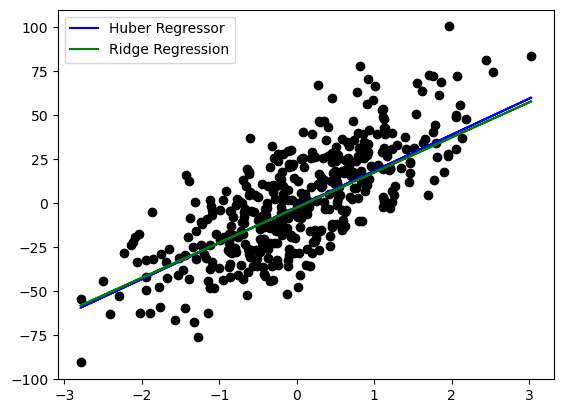

In [35]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.linear_model import HuberRegressor, Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

# Generate a sample dataset with strong outliers 
X, y = make_regression(n_samples=500, n_features=1, noise=20, random_state=1) 
y[y > 220] = 250

# Split the data into training and testing sets 
X_train, X_test = X[:80], X[80:] 
y_train, y_test = y[:80], y[80:] 

# Fit a HuberRegressor to the training data 
huber_regressor = HuberRegressor(epsilon=1.35) 
huber_regressor.fit(X_train, y_train) 

# Fit a Ridge Regression to the training data 
ridge_regressor = Ridge(alpha=0.1) 
ridge_regressor.fit(X_train, y_train) 

# Make predictions on the test data 
y_pred_huber = huber_regressor.predict(X_test) 
y_pred_ridge = ridge_regressor.predict(X_test) 

# Calculate the mean squared error and mean absolute error 
mse_huber = mean_squared_error(y_test, y_pred_huber) 
mae_huber = mean_absolute_error(y_test, y_pred_huber) 
mse_ridge = mean_squared_error(y_test, y_pred_ridge) 
mae_ridge = mean_absolute_error(y_test, y_pred_ridge) 

print("Huber Regressor MSE:", mse_huber) 
print("Huber Regressor MAE:", mae_huber) 
print("Ridge Regression MSE:", mse_ridge) 
print("Ridge Regression MAE:", mae_ridge) 

# Plot the actual values and predictions 
plt.scatter(X_test, y_test, color='black') 
plt.plot(X_test, y_pred_huber, color='blue', label='Huber Regressor') 
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression') 
plt.legend() 
plt.show() 


Ref: https://www.listendata.com/2018/03/regression-analysis.html and 

https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/ and 

https://www.statology.org/types-of-regression/